In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义计算的各参数
Z = 14
n = 3
    
#定义R函数
def R(r):
    rho = (2*Z*r)/n
    part1 = 1/(9*np.sqrt(3))
    part2 = (6-6*rho+rho**2)
    part3 = Z**(1.5)
    part4 = np.exp(-rho/2)
    return part1*part2*part3*part4

#定义积分中的各参数
r_min,r_max = 0,40
r0 = 5e-4
epsilon = 1e-3
S = None

#定义待积分的函数
def f(r):
    return (R(r)*r)**2

#使用辛普森法（Simpson's Rule）
def SR(f,a,b):
    m = (a + b) / 2
    S = (b - a) / 6 * (f(a) + 4 * f(m) + f(b))
    return S

#使用自适应辛普森法（Adaptive Simpson's Rule）,用于处理变化部分地方变化较快的平滑函数
def ASR(f,a,b,S=None):
    if S is None:
        m = (a + b) / 2
        S = (b - a) / 6 * (f(a) + 4 * f(m) + f(b))
    
    m = (a + b) / 2
    S1 = (m - a) / 6 * (f(a) + 4 * f((a + m) / 2) + f(m))
    S2 = (b - m) / 6 * (f(m) + 4 * f((m + b) / 2) + f(b))
    S3 = S1 + S2
    
    if np.abs(S3 - S) < epsilon:
        return S3 
    else:
        return (ASR(f, a, m, S1) +
                ASR(f, m, b, S2))

In [3]:
N = 100

h1 = (r_max-r_min)/N
r_array1 = np.linspace(r_min,r_max,N)
f_array1 = f(r_array1)

# 带入r_max=r0[exp((N-1)h)-1]
h2 = np.log((r_max/r0)+1)/(N-1)
t_array = np.arange(N)*h2
r_array2 = r0*(np.exp(t_array)-1)
f_array2 = f(r_array2)

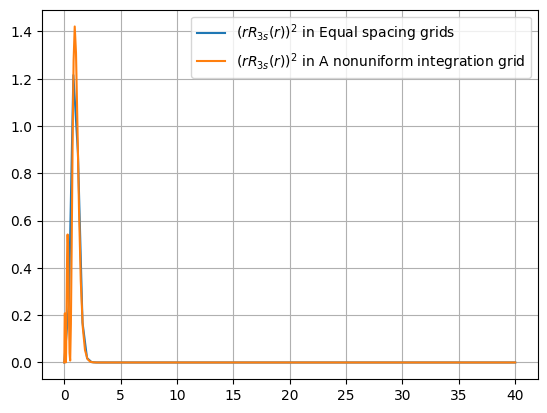

In [4]:
plt.figure()

plt.plot(r_array1,f_array1,label = '$(rR_{3s}(r))^2$ in Equal spacing grids')
plt.plot(r_array2,f_array2,label = '$(rR_{3s}(r))^2$ in A nonuniform integration grid')

plt.grid(True)
plt.legend()
plt.show()

In [5]:
# 对不同N，在Simpson's Rule下使用Equal spacing grids和A nonuniform integration grid积分
def Int(N):
    r_array1 = np.linspace(r_min,r_max,N)

    # 带入r_max=r0[exp((N-1)h)-1]
    h2 = np.log((r_max/r0)+1)/(N-1)
    t_array = np.arange(N)*h2
    r_array2 = r0*(np.exp(t_array)-1)
    
    int1 = 0
    int2 = 0
    for i in range(N-1):
        int1 += SR(f,r_array1[i],r_array1[i+1])
        int2 += SR(f,r_array2[i],r_array2[i+1])
    
    return int1,int2

def Int_adapt(N):
    r_array1 = np.linspace(r_min,r_max,N)

    # 带入r_max=r0[exp((N-1)h)-1]
    h2 = np.log((r_max/r0)+1)/(N-1)
    t_array = np.arange(N)*h2
    r_array2 = r0*(np.exp(t_array)-1)
    
    int1 = 0
    int2 = 0
    for i in range(N-1):
        int1 += ASR(f,r_array1[i],r_array1[i+1])
        int2 += ASR(f,r_array2[i],r_array2[i+1])
    
    return int1,int2

In [6]:
N_array = np.arange(1,100)

N_plot = N_array

int_array1 = np.array([])
int_array2 = np.array([])
AdaptInt_array1 = np.array([])
AdaptInt_array2 = np.array([])


for N in N_array:
    int1,int2 =  Int(N)
    AdaptInt1,AdaptInt2 = Int_adapt(N)
    
    int_array1 = np.append(int_array1,int1)
    int_array2 = np.append(int_array2,int2)
    
    AdaptInt_array1 = np.append(AdaptInt_array1,AdaptInt1)
    AdaptInt_array2 = np.append(AdaptInt_array2,AdaptInt2)
    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32500\3434297330.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  h2 = np.log((r_max/r0)+1)/(N-1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32500\3434297330.py:7: RuntimeWarning: invalid value encountered in multiply
  t_array = np.arange(N)*h2
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32500\3434297330.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  h2 = np.log((r_max/r0)+1)/(N-1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32500\3434297330.py:23: RuntimeWarning: invalid value encountered in multiply
  t_array = np.arange(N)*h2


In [7]:
print(int_array1)
print(int_array2)
print(AdaptInt_array1)
print(AdaptInt_array2)

[0.00000000e+00 1.17097439e-67 2.92844911e-29 5.19841024e-17
 3.68793508e-11 8.14491173e-08 1.06457739e-05 2.85897194e-04
 2.91412012e-03 1.57782128e-02 5.53606093e-02 1.42585525e-01
 2.92569875e-01 5.05695745e-01 7.65735237e-01 1.04489651e+00
 1.31196822e+00 1.53968911e+00 1.70927500e+00 1.81184196e+00
 1.84749633e+00 1.82314640e+00 1.74993668e+00 1.64089690e+00
 1.50910131e+00 1.36641742e+00 1.22279343e+00 1.08597370e+00
 9.61517425e-01 8.53006907e-01 7.62354825e-01 6.90144720e-01
 6.35961536e-01 5.98687129e-01 5.76748957e-01 5.68319140e-01
 5.71466629e-01 5.84268168e-01 6.04884948e-01 6.31611924e-01
 6.62906169e-01 6.97399764e-01 7.33901718e-01 7.71392492e-01
 8.09013794e-01 8.46055672e-01 8.81942306e-01 9.16217484e-01
 9.48530396e-01 9.78622151e-01 1.00631323e+00 1.03149203e+00
 1.05410439e+00 1.07414432e+00 1.09164562e+00 1.10667450e+00
 1.11932304e+00 1.12970353e+00 1.13794343e+00 1.14418108e+00
 1.14856197e+00 1.15123558e+00 1.15235267e+00 1.15206304e+00
 1.15051368e+00 1.147847

In [8]:
print("最终认为积分结果为：{}".format(Int_adapt(1000)[1]))

最终认为积分结果为：1.0000000000084965


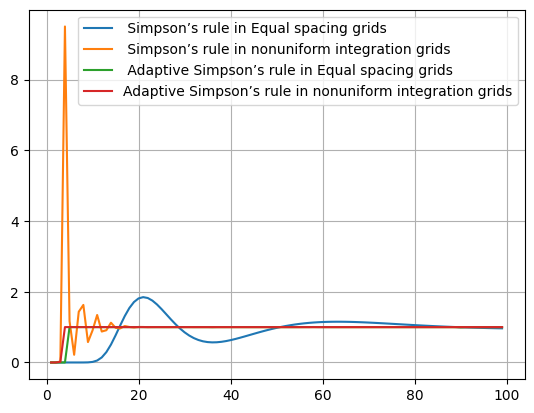

In [9]:
plt.figure()

plt.plot(N_plot,int_array1,label = " Simpson’s rule in Equal spacing grids")
plt.plot(N_plot,int_array2,label = " Simpson’s rule in nonuniform integration grids")
plt.plot(N_plot,AdaptInt_array1,label = " Adaptive Simpson’s rule in Equal spacing grids")
plt.plot(N_plot,AdaptInt_array2,label = "Adaptive Simpson’s rule in nonuniform integration grids")

plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 图例放在右侧中央
plt.show()

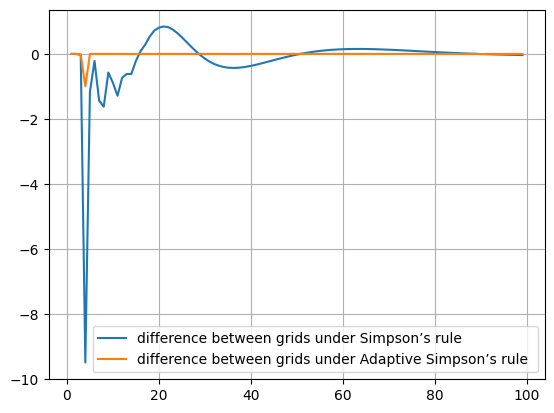

In [10]:
plt.figure()

plt.plot(N_plot,int_array1-int_array2,label = "difference between grids under Simpson’s rule ")
plt.plot(N_plot,AdaptInt_array1-AdaptInt_array2,label = "difference between grids under Adaptive Simpson’s rule ")

plt.grid(True)
plt.legend()
plt.show()